In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


In [ ]:
#Test Data
dataset = pd.read_excel('/content/drive/MyDrive/MTP_FINAL/Chilikaujainiukai_Inland_Water/CHILIKAUJANI.xlsx')
dataset_y = dataset['Chlorophyll']
dataset_x = dataset.drop(['Chlorophyll','Site'], axis = 1)

In [ ]:
# Only select rows that have all finite entries.
dataset_x = dataset_x[np.all(np.isfinite(dataset_x), axis=1)]
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(dataset_x)) #scaling the data
scaled_data
scaled_data = scaled_data.to_numpy()

In [ ]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2, learning_rate='auto',init='random')
X_embedded= t_sne.fit_transform(scaled_data)

X_embedded.shape

(38, 2)

In [ ]:
X_embedded = np.vstack((X_embedded.T,dataset_y)).T
X_df = pd.DataFrame(data=X_embedded,columns=("Dim_1","Dim_2","label"))

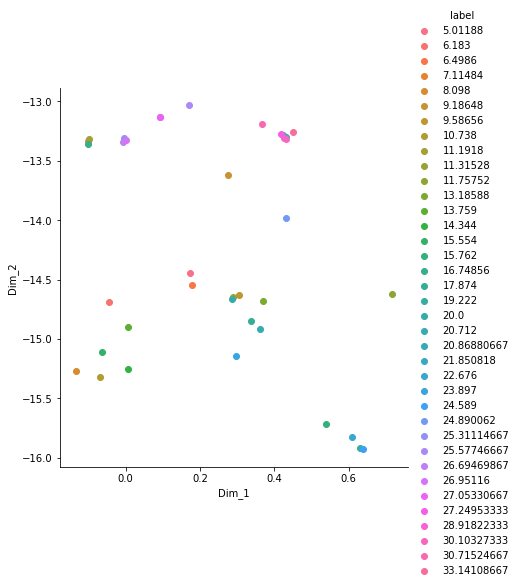

In [ ]:
sns.FacetGrid(X_df, hue = "label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_embedded, dataset_y, test_size = 0.3, random_state = 0)

In [ ]:
dataset_y
X_embedded

array([[-1.13019152e+01,  4.02091965e-02],
       [-1.16735249e+01, -9.31093767e-02],
       [-1.17193117e+01, -3.09318788e-02],
       [-1.10281811e+01,  3.37883592e-01],
       [-9.76811218e+00, -7.35023990e-02],
       [-9.71680546e+00, -7.05322176e-02],
       [-9.72739029e+00,  4.44298834e-01],
       [-9.73830223e+00,  3.69507521e-02],
       [-9.72733498e+00,  3.06905564e-02],
       [-9.43912983e+00,  1.73516646e-01],
       [-9.52720451e+00,  2.54953921e-01],
       [-9.70696259e+00,  4.65366125e-01],
       [-9.70808125e+00,  2.98714824e-02],
       [-9.70854378e+00,  2.87860706e-02],
       [-1.13165655e+01,  3.94718438e-01],
       [-1.21029596e+01,  5.84033966e-01],
       [-1.23113413e+01,  6.80309355e-01],
       [-1.12404375e+01,  3.69074970e-01],
       [-1.10586586e+01,  3.20100784e-01],
       [-1.15398159e+01,  3.32499564e-01],
       [-1.15191078e+01, -2.56844889e-02],
       [-1.10953979e+01, -8.90331902e-03],
       [-1.16531744e+01,  4.63260710e-02],
       [-1.

                **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(X_train, y_train)
r_sq = model_lr.score(X_train, y_train)
y_predicted_lr = model_lr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_square = model_lr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_lr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_lr)
print(mape)

6.545441098918524
0.22880511439815998
5.032038048210449
0.47799718935830976


                  **Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor().fit(X_train, y_train)
y_predicted_gb = model_gb.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_gb))
print(rms)
r_square = model_gb.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_gb)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_gb)
print(mape)
print(model_gb.get_params())

7.148594658771092
0.08012747551588395
5.81680140444347
0.3752451528306229
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
#Hyperparameter tuning
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[50,100,500,1000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,3,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 0.5}

In [ ]:
GBR2 = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,subsample=0.5,max_depth=3,random_state=1)
model_gbhp = GBR2.fit(X_train, y_train)
y_predicted_gbhp = model_gbhp.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_gbhp))
print(rms)
r_square = model_gbhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_gbhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_gbhp)
print(mape)

7.779452473369697
-0.08939246344520013
6.301743095745505
0.4347726837064117


          **PLS Regression**

In [ ]:
from sklearn.cross_decomposition import PLSRegression
model_plsr = PLSRegression(n_components=41, scale=True)
model_plsr.fit(X_train, y_train)
y_predicted_plsr = model_plsr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_plsr))
print(rms)
r_square = model_plsr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_plsr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_plsr)
print(mape)

6.371041729387944
0.26935367891290496
5.193631464094101
0.5000694434630953


In [ ]:
#Hyperparameter Tuning
r_square = []
rms = [] #to store rmse values for different n_components
mae = []
mape = []
for n_comp in range(1, 41):
  model_plsrhp = PLSRegression(n_components=n_comp, scale=True)
  model_plsrhp.fit(X_train, y_train)
  y_predicted_plsrhp = model_plsrhp.predict(X_test)
  rms_val = sqrt(mean_squared_error(y_test,y_predicted_plsrhp)) #calculate rmse
  rms.append(rms_val) #store rmse values
  r2 = model_plsrhp.score(X_test,y_test)
  r_square.append(r2) #store r2 values
  mae_1 = mean_absolute_error(y_test,y_predicted_plsrhp)
  mae.append(mae_1)
  mape_1 = mean_absolute_percentage_error(y_test, y_predicted_plsrhp)
  mape.append(mape_1)

In [ ]:
print(min(rms))
print(max(r_square))
print(min(mae))
print(min(mape))

6.371041729387944
0.26935367891290496
5.193631464094101
0.5000694434630953


                **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators = 500)
model_rfr.fit(X_train,y_train)
y_predicted_rfr = model_rfr.predict(X_test) 

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rfr))
print(rms)
r_square = model_rfr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rfr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rfr)
print(mape)
print(model_rfr.get_params())

5.9082927496159385
0.37163741944636264
4.8712784540666565
0.3713964383648268
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True],'max_depth': [100, 110],'max_features': [2, 3],'min_samples_leaf': [1,2,3],'min_samples_split': [1,2,3],'n_estimators': [100, 500, 1000]}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_rfrhp = grid_search.best_estimator_
model_rfrhp.fit(X_train,y_train)
y_predicted_rfrhp = model_rfrhp.predict(X_test)  

Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'bootstrap': True, 'max_depth': 110, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rfrhp))
print(rms)
r_square = model_rfrhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rfrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rfrhp)
print(mape)

5.867918363912217
0.3801959225578473
4.811716997294994
0.3639600717823135


                **KNN**

In [ ]:
from sklearn import neighbors
r_square = []
rms = []
mae = []
mape = []
 #to store rmse values for different k
for K in range(20):
    K = K+1
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    y_predicted_knn = model_knn.predict(X_test) #make prediction on test set
    rms_val = sqrt(mean_squared_error(y_test,y_predicted_knn)) #calculate rmse
    rms.append(rms_val) #store rmse values
    r2 = model_knn.score(X_test,y_test)
    r_square.append(r2) #store r2 values
    mae_1 = mean_absolute_error(y_test,y_predicted_knn)
    mae.append(mae_1)
    mape_1 = mean_absolute_percentage_error(y_test, y_predicted_knn)
    mape.append(mape_1)

In [ ]:
print(min(rms))
print(max(r_square))
print(min(mae))
print(min(mape))

5.556709611738789
0.4441959516924483
4.100849556000001
0.39376116033221303


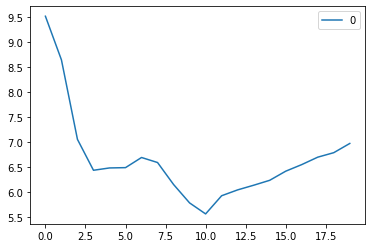

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rms) #elbow curve 
curve.plot()

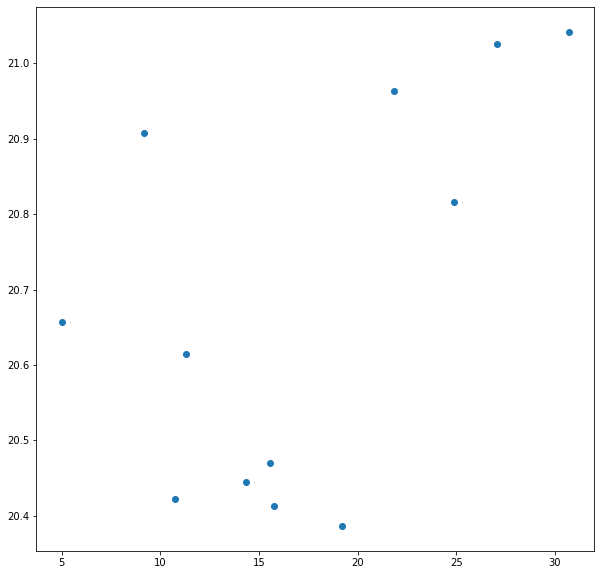

In [ ]:
from sklearn.svm import SVR
model_svr = SVR(kernel = 'rbf')
model_svr.fit(X_train, y_train)
y_predicted_svr = model_svr.predict(X_test)
plt.figure(figsize = (10,10))
plt.scatter(y_test,y_predicted_svr)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_svr))
print(rms)
r_square = model_svr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_svr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_svr)
print(mape)

8.1348437223751
-0.19120012664695252
6.987053872702042
0.6633710065107608


In [ ]:
#Hyperparameter Tuning
c_range = np.logspace(-3, 3, 5)
gamma_range = np.logspace(-3, 3, 5)
parameters = {'kernel': ['rbf'], 'C': c_range,'gamma': gamma_range,'epsilon':[1,0.1,0.01,0.001,0.0001]}
svr = SVR()
grid_search = GridSearchCV(svr, parameters)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'C': 1000.0, 'epsilon': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}


In [ ]:
model_svrhp = grid_search.best_estimator_
model_svrhp.fit(X_train,y_train)
y_predicted_svrhp = model_svrhp.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_svrhp))
print(rms)
r_square = model_svrhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_svrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_svrhp)
print(mape)

8.103634617613404
-0.1820776461412339
4.528937532318889
0.35537991006020647


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model_abr = AdaBoostRegressor().fit(X_train, y_train)
y_predicted_abr = model_abr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_abr))
print(rms)
r_square = model_abr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_abr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_abr)
print(mape)
print(model_abr.get_params())

6.396071571161849
0.263601437303036
5.370313152036435
0.39971537822511255
{'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}


In [ ]:
#Hyperparametrer Tuning
param_grid = {'n_estimators':list(range(0, 1000, 100)), 'learning_rate':[100,10,1,0.1, 0.01, 0.001,0.0001,0.00001]}
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=1, cv=5)

In [ ]:
#fit the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_adbhp = grid_search.best_estimator_
model_adbhp.fit(X_train,y_train)
y_predicted_abrhp = model_adbhp.predict(X_test) 

{'learning_rate': 1, 'n_estimators': 400}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_abrhp))
print(rms)
r_square = model_adbhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_abrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_abrhp)
print(mape)

6.358846412139622
0.27214817813196135
5.368414301600197
0.4022774384633176


In [ ]:
#Ridge Regression, using Grid Search CV to find the best parameter for alpha
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regression.best_params_)

{'alpha': 0.01}


In [ ]:
model_rr = Ridge(alpha=0.01).fit(X_train,y_train)
y_predicted_rr = model_rr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rr))
print(rms)
r_square = model_rr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rr)
print(mape)

6.363390205275487
0.27110761526846794
5.18405948426595
0.49932074844203567


In [ ]:
#Lasso Regression, using Grid Search CV to find the best parameter for alpha
from sklearn.linear_model import Lasso
lasso = Lasso()
a = [0.000000000000000000000000001*(10)**i for i in range(100)]
parameters = {"alpha":a}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-27, 1e-26, 1e-25, 1.0000000000000001e-24,
                                   1.0000000000000001e-23, 1e-22,
                                   1.0000000000000001e-21,
                                   1.0000000000000001e-20,
                                   1.0000000000000001e-19, 1e-18, 1e-17, 1e-16,
                                   1e-15, 1e-14, 1e-13, 1e-12,
                                   1.0000000000000001e-11, 1e-10, 1e-09, 1e-08,
                                   1.0000000000000001e-07, 1e-06, 1e-05,
                                   9.999999999999999e-05, 0.001,
                                   0.010000000000000002, 0.1, 1.0, 10.0, 100.0, ...]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regression.best_params_)

{'alpha': 0.010000000000000002}


In [ ]:
model_lr = Lasso(alpha=0.010000000000000002).fit(X_train,y_train)
y_predicted_lr = model_lr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_square = model_lr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_lr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_lr)
print(mape)

6.359414078441685
0.2720182189010145
5.178902013562825
0.49887596284570757


In [ ]:
#Untransformed Data
loo = LeaveOneOut()
ytests = []
ypreds = []
for train_idx, test_idx in loo.split(scaled_data):
    X_train, X_test = scaled_data[train_idx], scaled_data[test_idx] #requires arrays
    y_train, y_test = dataset_y[train_idx], dataset_y[test_idx]
    model = LinearRegression()
    model.fit(X = X_train, y = y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

NameError: ignored

In [ ]:
#Transformed Data
loo = LeaveOneOut()
ytests = []
ypreds = []
for train_idx, test_idx in loo.split(X_embedded):
    X_train, X_test = X_embedded[train_idx], X_embedded[test_idx] #requires arrays
    y_train, y_test = dataset_y[train_idx], dataset_y[test_idx]
    
    model = LinearRegression()
    model.fit(X = X_train, y = y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

Leave One Out Cross Validation
R^2: 25.23004%, MSE: 47.06293


                      **Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Transformed Data
loo = LeaveOneOut()
ytests = []
ypreds = []
for train_idx, test_idx in loo.split(X_embedded):
    X_train, X_test = X_embedded[train_idx], X_embedded[test_idx] #requires arrays
    y_train, y_test = dataset_y[train_idx], dataset_y[test_idx]
    
    model = GradientBoostingRegressor()
    model.fit(X = X_train, y = y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

Leave One Out Cross Validation
R^2: 24.16929%, MSE: 47.73061


                           **PLS** **Regression**

In [ ]:
from sklearn.cross_decomposition import PLSRegression

In [ ]:
#Transformed Data
loo = LeaveOneOut()
ytests = []
ypreds = []
for train_idx, test_idx in loo.split(X_embedded):
    X_train, X_test = X_embedded[train_idx], X_embedded[test_idx] #requires arrays
    y_train, y_test = dataset_y[train_idx], dataset_y[test_idx]
    
    model =PLSRegression(n_components=2, scale=True)
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

Leave One Out Cross Validation
R^2: 25.23002%, MSE: 47.06294


                             **Random** **Forset**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Transformed Data
loo = LeaveOneOut()
ytests = []
ypreds = []
for train_idx, test_idx in loo.split(X_embedded):
    X_train, X_test = X_embedded[train_idx], X_embedded[test_idx] #requires arrays
    y_train, y_test = dataset_y[train_idx], dataset_y[test_idx]
    
    model = RandomForestRegressor(n_estimators = 500)
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

Leave One Out Cross Validation
R^2: 36.59299%, MSE: 39.91068


                                        **SVR**

In [ ]:
from sklearn.svm import SVR

In [ ]:
#Transformed Data
loo = LeaveOneOut()
ytests = []
ypreds = []
for train_idx, test_idx in loo.split(X_embedded):
    X_train, X_test = X_embedded[train_idx], X_embedded[test_idx] #requires arrays
    y_train, y_test = dataset_y[train_idx], dataset_y[test_idx]
    
    model = SVR(kernel = 'linear', epsilon = 10000)
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

Leave One Out Cross Validation
R^2: -2.39212%, MSE: 64.44932
